# IMPORTING MODULES

In [102]:
import numpy as np

# dataa split
from sklearn.model_selection import train_test_split

# model Evaluation
from sklearn import metrics

#navie bayesian and accuracy
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#pandas
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn')

In [103]:
import seaborn as sns
import plotly.express as px

# SMOTE
from imblearn.over_sampling import SMOTE

# scaling
from sklearn.preprocessing import StandardScaler

# tune
from sklearn.model_selection import RandomizedSearchCV


# READING THE DATASET

In [104]:
data=pd.read_csv('dataset.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3421,68398,Male,82,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
3422,45010,Female,57,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
3423,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
3424,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


# DATA ENCODING (PREPARATION)

In [105]:
# convert string to numeric using map

# gender
data['gender'] = data['gender'].map({
'Male': int(0),
'Female':int(1),
'Other':int(2)})

# ever_married
data['ever_married'] =data['ever_married'].map({
'Yes':int(1), 
'No':int(0)})

# work_type
data['work_type'] = data['work_type'].map({
'Private':int(3), 
'Self-employed':int(4),
'Govt_job':int(2), 
'children':int(1), 
'Never_worked':int(0)})

# Residence_type
data['Residence_type'] = data['Residence_type'].map({
'Urban':int(2), 
'Rural':int(1)})

# smoking_status
data['smoking_status'] = data['smoking_status'].map({
'formerly smoked':int(1),
'never smoked':int(2), 
'smokes':int(3),
'Unknown':int(0)})

In [106]:
### attributes used in the classification

In [107]:
x=data[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]
y=data[['stroke']]
x=x.values
y=y.values

# SPLIT DATASET 

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [109]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,random_state=42)

In [110]:
print(X_train.shape)
print(X_test.shape)

(2740, 10)
(686, 10)


In [111]:
y_train=y_train.flatten()
y_test=y_test.flatten()
print(y_train.shape)
print(y_test.shape)

(2740,)
(686,)


# RELU activation function

In [112]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [113]:

# define keras model
model=tf.keras.Sequential()

model.add(tf.keras.layers.Dense(units=25,activation='relu'))

#compile keras model
model.compile('adam','binary_crossentropy',metrics=['accuracy'])

Epoch 1/5
86/86 [==============================] - 0s 3ms/step - loss: 6.2830 - accuracy: 0.0000e+00 - val_loss: 5.1664 - val_accuracy: 0.0000e+00
Epoch 2/5
86/86 [==============================] - 0s 1ms/step - loss: 4.9580 - accuracy: 0.0000e+00 - val_loss: 4.5233 - val_accuracy: 0.0000e+00
Epoch 3/5
86/86 [==============================] - 0s 2ms/step - loss: 4.2441 - accuracy: 0.0000e+00 - val_loss: 4.2516 - val_accuracy: 0.0000e+00
Epoch 4/5
86/86 [==============================] - 0s 1ms/step - loss: 4.1304 - accuracy: 0.0000e+00 - val_loss: 4.2113 - val_accuracy: 0.0000e+00
Epoch 5/5
86/86 [==============================] - 0s 1ms/step - loss: 4.0605 - accuracy: 0.0000e+00 - val_loss: 3.9634 - val_accuracy: 0.0000e+00


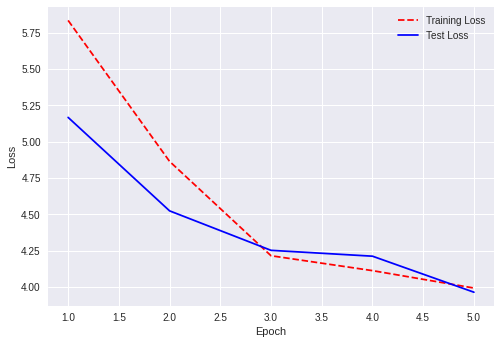

In [114]:
#fitting ANN model into training data
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=5, verbose=1)

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

### INFERENCE

From the above graph we can see that the Loss of Training almost touches 5.75 where as the test touchesto 5.15 at Epoch 1.0
And Also they intersected at Epoch 3.0 and 5.0 .The loss is really high at the intial values of epoch and it gradually decreased as
the value of the epoch increased.The modern default activation function for hidden layers is the ReLU function.

# TANH activation function

In [115]:
# define keras model
model=tf.keras.Sequential()

model.add(tf.keras.layers.Dense(units=25,activation='tanh'))

#compile keras model
model.compile('adam','binary_crossentropy',metrics=['accuracy'])

Epoch 1/5
86/86 [==============================] - 1s 5ms/step - loss: 8.6138 - accuracy: 0.1481 - val_loss: 6.7507 - val_accuracy: 0.0641
Epoch 2/5
86/86 [==============================] - 0s 2ms/step - loss: 6.4024 - accuracy: 0.0443 - val_loss: 5.9461 - val_accuracy: 0.0641
Epoch 3/5
86/86 [==============================] - 0s 1ms/step - loss: 5.8417 - accuracy: 0.0530 - val_loss: 5.7929 - val_accuracy: 0.0641
Epoch 4/5
86/86 [==============================] - 0s 1ms/step - loss: 5.7052 - accuracy: 0.0458 - val_loss: 5.7810 - val_accuracy: 0.0641
Epoch 5/5
86/86 [==============================] - 0s 1ms/step - loss: 5.7271 - accuracy: 0.0530 - val_loss: 5.7797 - val_accuracy: 0.0641


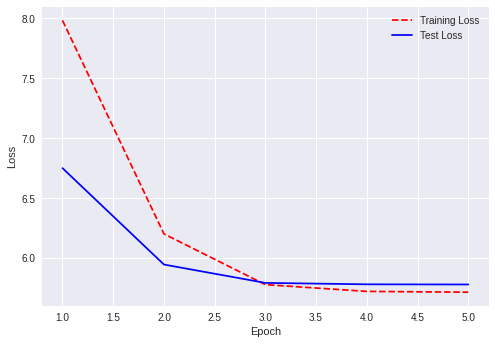

In [116]:
#fitting ANN model into training data
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=5, verbose=1)

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

### INFERENCE

From the above graph we can see that the Loss of Training almost touches 8.0 where as the test touchesto 6.5 at Epoch 1.0 
And Also they intersected at Epoch 2.8 .The loss is really high at the intial values of epoch and it gradually decreased 
as the value of the epoch increased and it became constant after some particular value of epochso.They are basically used in
feed-forward nets.

# SIGMOID activation function

In [117]:
# define keras model
model=tf.keras.Sequential()

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

#compile keras model
model.compile('adam','binary_crossentropy',metrics=['accuracy'])

Epoch 1/5
86/86 [==============================] - 0s 3ms/step - loss: 4.7389 - accuracy: 0.9495 - val_loss: 4.9263 - val_accuracy: 0.9359
Epoch 2/5
86/86 [==============================] - 0s 1ms/step - loss: 3.1974 - accuracy: 0.9542 - val_loss: 3.8860 - val_accuracy: 0.9329
Epoch 3/5
86/86 [==============================] - 0s 1ms/step - loss: 3.1916 - accuracy: 0.9471 - val_loss: 2.9092 - val_accuracy: 0.9257
Epoch 4/5
86/86 [==============================] - 0s 2ms/step - loss: 2.4610 - accuracy: 0.9386 - val_loss: 2.2396 - val_accuracy: 0.8950
Epoch 5/5
86/86 [==============================] - 0s 1ms/step - loss: 1.6536 - accuracy: 0.9114 - val_loss: 2.0050 - val_accuracy: 0.8746


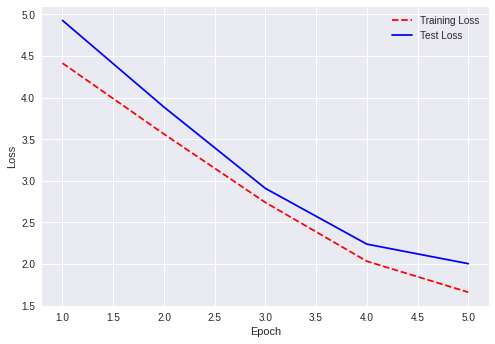

In [118]:
#fitting ANN model into training data
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=5, verbose=1)

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

### INFERENCE

From the above graph we can see that the Loss of Training don't meet.
so it usually does not perform well apparently it is used only for the output layer for the binary classification.